In [1]:
import numpy as np

import soss_read_refs

import matplotlib.pyplot as plt

plt.rc('figure', figsize=(13,8))
plt.rc('font', size=16)
plt.rc('image', cmap='inferno')
plt.rc('lines', lw=2)

Once you've downloaded the reference files from dropbox to a folder set the path to that folder here. No need to unzip them.

In [2]:
soss_read_refs.PATH = '/home/talens-irex/Dropbox/SOSS_Ref_Files'

Example: how to use the trace table.

In [3]:
reference = soss_read_refs.RefTraceTable()
wavelenghts, y = reference('Y', subarray='SUBSTRIP96')
wavelenghts, x = reference('X', subarray='SUBSTRIP96')

(0.0, 95.0)

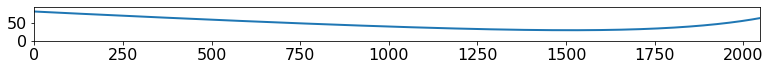

In [4]:
plt.subplot(111, aspect='equal')
plt.plot(x, y)
plt.xlim(0, 2047)
plt.ylim(0, 95)

In [5]:
wavelengths = np.linspace(2, 3, 101)
wavelengths, troughput = reference('THROUGHPUT', wavelengths=wavelengths, order=2)

Text(0, 0.5, 'Throughput')

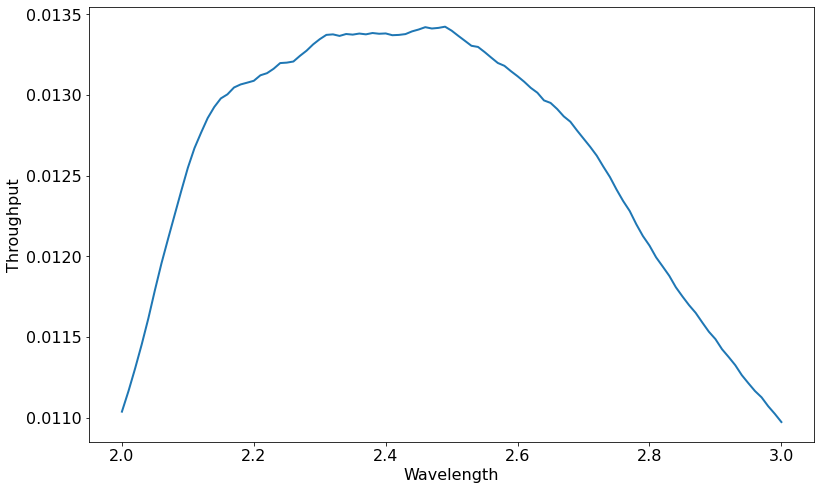

In [6]:
plt.plot(wavelengths, troughput)
plt.xlabel('Wavelength')
plt.ylabel('Throughput')

Example: how to use the 2d profile and 2d wavemap.

In [7]:
reference = soss_read_refs.Ref2dProfile()
profile = reference(order=2)

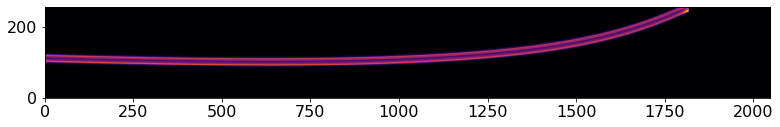

In [8]:
plt.imshow(profile, origin='lower')

If you don't want the 2d maps to have their padding removed and binned down to native pixels.

In [9]:
profile = reference(native=False)

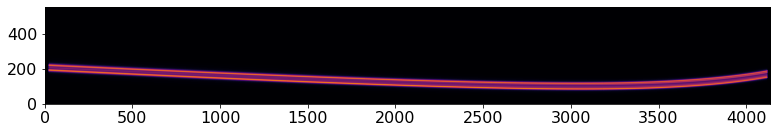

In [10]:
plt.imshow(profile, origin='lower')

In [11]:
reference = soss_read_refs.Ref2dWave()
wavemap = reference(subarray='SUBSTRIP96', offset=[2.3, 3.5])

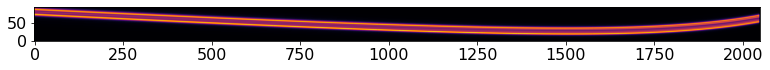

In [12]:
plt.imshow(wavemap, origin='lower')

Example: how to use the kernels.

In [13]:
reference = soss_read_refs.RefKernels()
wavelengths, kernels = reference()

[[0.5  0.55 0.6  ... 5.1  5.15 5.2 ]
 [0.5  0.55 0.6  ... 5.1  5.15 5.2 ]
 [0.5  0.55 0.6  ... 5.1  5.15 5.2 ]
 ...
 [0.5  0.55 0.6  ... 5.1  5.15 5.2 ]
 [0.5  0.55 0.6  ... 5.1  5.15 5.2 ]
 [0.5  0.55 0.6  ... 5.1  5.15 5.2 ]]


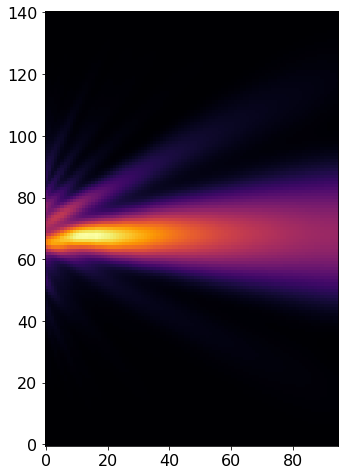

In [14]:
print(wavelengths)
plt.imshow(kernels, origin='lower')